# Deblending with different solvers visualization

In [47]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy as sp

from IPython.display import HTML
from pocsdeblend.visual import *
from pocsdeblend.video import visualize_iterations

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Final results

In [2]:
# data params
f0 = 30

# blending params
overlap = 0.3
sigma_ignition = 0.25

In [3]:
# Load data
if f0 == 10:
    # 10 Hz
    dx = 12.5
    data = np.load("../../data/seam1_obc_10Hz/Shot0.npy")[:3480, :1600].T#[:4000, 200:2000].T
elif f0 == 30:
    # 30 Hz
    data = np.load("../../data/seam1_obc_30Hz/Shot2.npy")[:, ::2][:3480, 800:2400].T#[:4000, 200:2000].T
    dx = 10
elif f0 == 40:
    # 40 Hz
    data = np.load("../../data/seam1_obc_40Hz/Shot0.npy")[:, ::2][:3480, 600:2200].T#[:4000, 200:2000].T
    dx = 10

data *= 10 / data.max()
ns, nt = data.shape

dt = 0.004
t = np.arange(nt) * dt
s = np.arange(ns) * dx

In [4]:
# Load results
f = np.load(f"results/Seam1OBCaramco_SNR_over{overlap}_sigma{sigma_ignition}.npz")

data_pseudo = f["data_pseudo"].T
data_fihta = f["data_fihta"].T
data_hqs0a = f["data_hqs0a"].T
data_admm0a = f["data_admm2"].T

snrfihta_hist = f["snrfihta_hist"].T
snrhqs0a_hist = f["snrhqs0a_hist"].T
snradmm0a_hist = f["snradmm_hist"].T

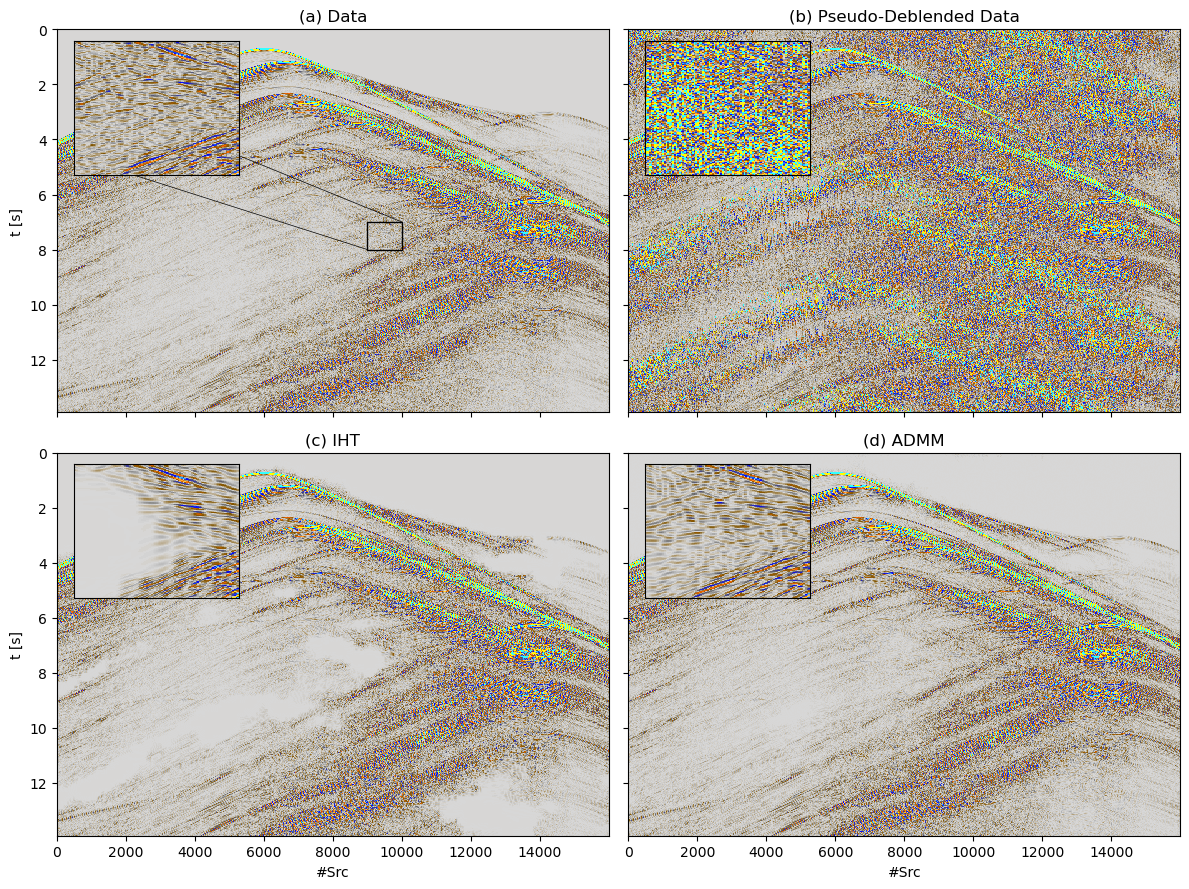

In [5]:
vclip = (-4e-1, 4e-1)
insx, insz = (9000, 10000), (8, 7)
#insx, insz = (8000, 10000), (13, 11)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 9))
axs = axs.ravel()
axs[0].imshow(data.T, cmap=cmap_amplitudepkdsg,
          extent=(s[0], s[-1], t[-1], t[0]),
          vmin=vclip[0], vmax=vclip[1],
          interpolation="none")
axs[0].set_title('(a) Data')
axs[0].set_ylabel("t [s]")
axs[0].axis("tight")
rect = patches.Rectangle((insx[0], insz[0]), insx[1]-insx[0], insz[1]-insz[0], 
                         linewidth=1, edgecolor='k', facecolor='none')
axs[0].add_patch(rect)
axs[0].plot([insx[0], s[int(len(s)*0.03)]], [insz[0], t[int(len(t)*0.33)]], 'k', lw=0.5)
axs[0].plot([insx[1], s[int(len(s)*0.33)]], [insz[1], t[int(len(t)*0.33)]], 'k', lw=0.5)

ins = axs[0].inset_axes([0.03,0.62,0.3,0.35])
ins.set_xticks([])
ins.set_yticks([])
ins.imshow(data.T, cmap=cmap_amplitudepkdsg,
           extent=(s[0], s[-1], t[-1], t[0]),
           vmin=0.6*vclip[0], vmax=0.6*vclip[1],
           interpolation="none")
ins.axis("tight")
ins.set_xlim(insx)
ins.set_ylim(insz)

axs[1].imshow(data_pseudo.squeeze().real.T, cmap=cmap_amplitudepkdsg,
          extent=(s[0], s[-1], t[-1], t[0]),
          vmin=vclip[0], vmax=vclip[1],
          interpolation="none")
axs[1].set_title('(b) Pseudo-Deblended Data')
axs[1].axis("tight")
ins = axs[1].inset_axes([0.03,0.62,0.3,0.35])
ins.set_xticks([])
ins.set_yticks([])
ins.imshow(data_pseudo.squeeze().real.T, cmap=cmap_amplitudepkdsg,
           extent=(s[0], s[-1], t[-1], t[0]),
           vmin=0.6*vclip[0], vmax=0.6*vclip[1],
           interpolation="none")
ins.axis("tight")
ins.set_xlim(insx)
ins.set_ylim(insz)

axs[2].imshow(data_fihta.squeeze().real.T, cmap=cmap_amplitudepkdsg,
          extent=(s[0], s[-1], t[-1], t[0]),
          vmin=vclip[0], vmax=vclip[1],
          interpolation="none")
axs[2].set_title('(c) IHT')
axs[2].set_ylabel("t [s]")
axs[2].set_xlabel("#Src")
axs[2].axis("tight")
ins = axs[2].inset_axes([0.03,0.62,0.3,0.35])
ins.set_xticks([])
ins.set_yticks([])
ins.imshow(data_fihta.squeeze().real.T, cmap=cmap_amplitudepkdsg,
           extent=(s[0], s[-1], t[-1], t[0]),
           vmin=0.6*vclip[0], vmax=0.6*vclip[1],
           interpolation="none")
ins.axis("tight")
ins.set_xlim(insx)
ins.set_ylim(insz)

#axs[3].imshow(data_hqs0a.squeeze().real.T, cmap=cmap_amplitudepkdsg,
axs[3].imshow(data_admm0a.squeeze().real.T, cmap=cmap_amplitudepkdsg,
          extent=(s[0], s[-1], t[-1], t[0]),
          vmin=vclip[0], vmax=vclip[1],
          interpolation="none")
axs[3].set_title('(d) ADMM')
axs[3].set_xlabel("#Src")
axs[3].axis("tight")
ins = axs[3].inset_axes([0.03,0.62,0.3,0.35])
ins.set_xticks([])
ins.set_yticks([])
#ins.imshow(data_hqs0a.squeeze().real.T, cmap=cmap_amplitudepkdsg,
ins.imshow(data_admm0a.squeeze().real.T, cmap=cmap_amplitudepkdsg,
           extent=(s[0], s[-1], t[-1], t[0]),
           vmin=0.6*vclip[0], vmax=0.6*vclip[1],
           interpolation="none")
ins.axis("tight")
ins.set_xlim(insx)
ins.set_ylim(insz)

plt.tight_layout()
plt.savefig(f'figs/Seam1OBCaramco_over{overlap}_sigma{sigma_ignition}.png', dpi=150, bbox_inches='tight')

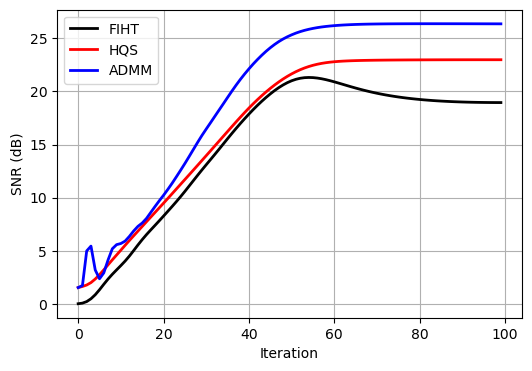

In [7]:
# SNRs vs iters
plt.figure(figsize=(6, 4))
plt.plot(snrfihta_hist, 'k', lw=2, label='FIHT')
plt.plot(snrhqs0a_hist, 'r', lw=2, label='HQS')
plt.plot(snradmm0a_hist, 'b', lw=2, label='ADMM')
plt.xlabel('Iteration')
plt.ylabel('SNR (dB)')
plt.legend()
plt.grid()
plt.savefig(f'figs/Seam1OBCaramco_SNR_over{overlap}_sigma{sigma_ignition}.png', dpi=150, bbox_inches='tight');

## Iterations

In [83]:
# Load results
f = np.load(f"results/Seam1OBCaramco_SNR_over{overlap}_sigma{sigma_ignition}_iterations.npz")

iters = f["iters"]
nitersvideo = len(iters)
data_fihta = f["data_fihta"]
data_hqs0a = f["data_hqs0a"]
data_admm2 = f["data_admm2"]

snrfihta_hist = f["snrfihta_hist"]
snrhqs0a_hist = f["snrhqs0a_hist"]
snradmm2_hist = f["snradmm_hist"]

print(iters)

[ 0  4  8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 92
 96]


In [103]:
# Display animations
animation = visualize_iterations([data_fihta[i] for i in range(nitersvideo)], vclip=vclip, cmap=cmap_amplitudepkdsg,
                                 extent=(s[0], s[-1], t[-1], t[0]), interval=1000, repeat=False, titles=[f'Iter{iters[i]}' for i in range(nitersvideo)],
                                 figsize=(3.5, 4), videofilename=f'figs/Seam1OBCaramco_ihtvideo_over{overlap}_sigma{sigma_ignition}.mp4', dpi=300)
HTML(animation.to_html5_video())

HTML(value='<video width="350" height="400" controls autoplay>\n  <source type="video/mp4" src="data:video/mp4…

In [104]:
animation = visualize_iterations([data_hqs0a[i] for i in range(nitersvideo)], vclip=vclip, cmap=cmap_amplitudepkdsg,
                                 extent=(s[0], s[-1], t[-1], t[0]), interval=1000, repeat=False, titles=[f'Iter{iters[i]}' for i in range(nitersvideo)],
                                 figsize=(3.5, 4), videofilename=f'figs/Seam1OBCaramco_hqs0avideo_over{overlap}_sigma{sigma_ignition}.mp4', dpi=300)
HTML(animation.to_html5_video())

HTML(value='<video width="350" height="400" controls autoplay>\n  <source type="video/mp4" src="data:video/mp4…

In [105]:
animation = visualize_iterations([data_admm2[i] for i in range(nitersvideo)], vclip=vclip, cmap=cmap_amplitudepkdsg,
                                 extent=(s[0], s[-1], t[-1], t[0]), interval=1000, repeat=False, titles=[f'Iter{iters[i]}' for i in range(nitersvideo)],
                                 figsize=(3.5, 4), videofilename=f'figs/Seam1OBCaramco_admm2video_over{overlap}_sigma{sigma_ignition}.mp4', dpi=300)
HTML(animation.to_html5_video())

HTML(value='<video width="350" height="400" controls autoplay>\n  <source type="video/mp4" src="data:video/mp4…

In [108]:
# Display animations
animation = visualize_iterations([data.T-data_fihta[i] for i in range(nitersvideo)], vclip=vclip, cmap=cmap_amplitudepkdsg,
                                 extent=(s[0], s[-1], t[-1], t[0]), interval=1000, repeat=False, titles=[f'Iter{iters[i]}' for i in range(nitersvideo)],
                                 figsize=(3.5, 4), videofilename=f'figs/Seam1OBCaramco_ihtresvideo_over{overlap}_sigma{sigma_ignition}.mp4', dpi=300)
HTML(animation.to_html5_video())

HTML(value='<video width="350" height="400" controls autoplay>\n  <source type="video/mp4" src="data:video/mp4…

In [109]:
animation = visualize_iterations([data.T-data_admm2[i] for i in range(nitersvideo)], vclip=vclip, cmap=cmap_amplitudepkdsg,
                                 extent=(s[0], s[-1], t[-1], t[0]), interval=1000, repeat=False, titles=[f'Iter{iters[i]}' for i in range(nitersvideo)],
                                 figsize=(3.5, 4), videofilename=f'figs/Seam1OBCaramco_admm2resvideo_over{overlap}_sigma{sigma_ignition}.mp4', dpi=300)
HTML(animation.to_html5_video())

HTML(value='<video width="350" height="400" controls autoplay>\n  <source type="video/mp4" src="data:video/mp4…

In [111]:
# SNRs vs iters
fig = plt.figure()
fig.set_size_inches(11, 6, forward=False)
ax = plt.Axes(fig, [0, 0, 1, 1])
ax.set_axis_off()
fig.add_axes(ax)
camera = Camera(fig)

for it in iters:
    plt.plot(snrfihta_hist[:it], 'k', lw=2, label='FIHT')
    #plt.plot(snrhqs0a_hist[:it], 'r', lw=2, label='HQS')
    plt.plot(snradmm0a_hist[:it], 'b', lw=2, label='ADMM')
    plt.xlabel('Iteration')
    plt.ylabel('SNR (dB)')
    if it == 0:
        plt.legend()
    camera.snap()
animation = camera.animate(interval=1000, repeat=False, blit=True)
plt.close()

animation.save(filename=f'figs/Seam1OBCaramco_SNRvideo_over{overlap}_sigma{sigma_ignition}.mp4', dpi=300,
               savefig_kwargs={'pad_inches': 'tight'})

HTML(animation.to_html5_video()) 

HTML(value='<video width="1100" height="600" controls autoplay>\n  <source type="video/mp4" src="data:video/mp…